In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import koreanize_matplotlib

In [26]:
# 타이타닉 데이터셋 로드
titanic = sns.load_dataset('titanic')

1. 승객의 생존 여부별로 각각의 수를 막대 그래프로 나타내세요.


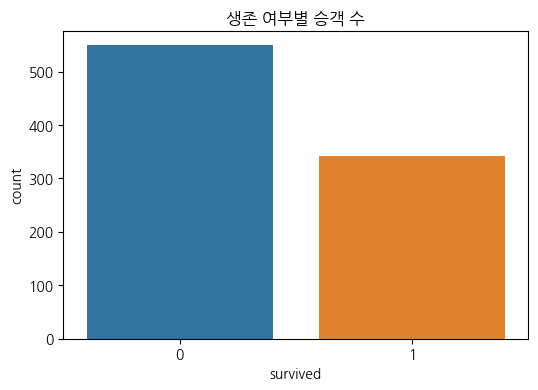

In [27]:
plt.figure(figsize=(6, 4))
sns.countplot(x='survived', data=titanic)
plt.title('생존 여부별 승객 수')
plt.show()

2. 승객들의 연령 분포를 히스토그램으로 표시하세요.


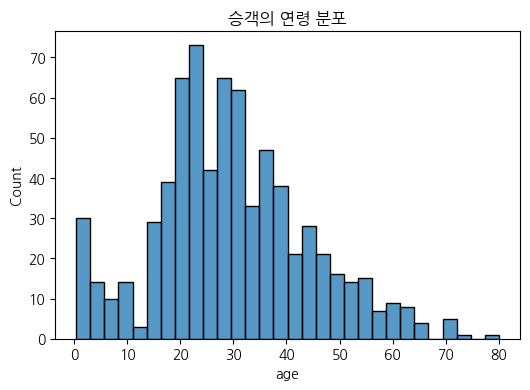

In [104]:
plt.figure(figsize=(6, 4))
sns.histplot(titanic['age'].dropna(), bins=30, kde=False)
plt.title('승객의 연령 분포')
plt.show()


3. 연령대별 생존자 수의 변화를 선 그래프로 나타내세요.


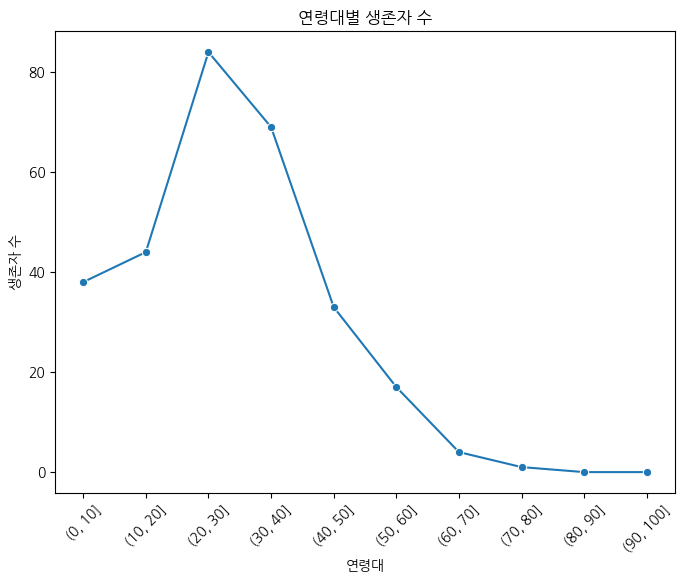

In [51]:
# 결측치 제거
# titanic.dropna(subset=['age'], inplace=True)

# 연령대 계산
age_bins = np.arange(0, 101, 10)
titanic['age_bin'] = pd.cut(titanic['age'], bins=age_bins)

# 연령대별 생존자 수 계산
age_bin_survived = titanic.groupby('age_bin')['survived'].sum().reset_index()
age_bin_survived['age_bin'] = age_bin_survived['age_bin'].astype(str)  # 연령대 구간을 문자열로 변환

# 선 그래프 그리기
plt.figure(figsize=(8, 6))
sns.lineplot(data=age_bin_survived, x='age_bin', y='survived', marker='o')  # x와 y 인자 명확하게 지정
plt.title('연령대별 생존자 수')
plt.xlabel('연령대')
plt.ylabel('생존자 수')
plt.xticks(rotation=45)  # x축 라벨 회전
plt.show()

4. 승객의 연령과 요금을 축으로 하는 스캐터 플롯을 그리고, 생존 여부에 따라 색상을 달리하세요.


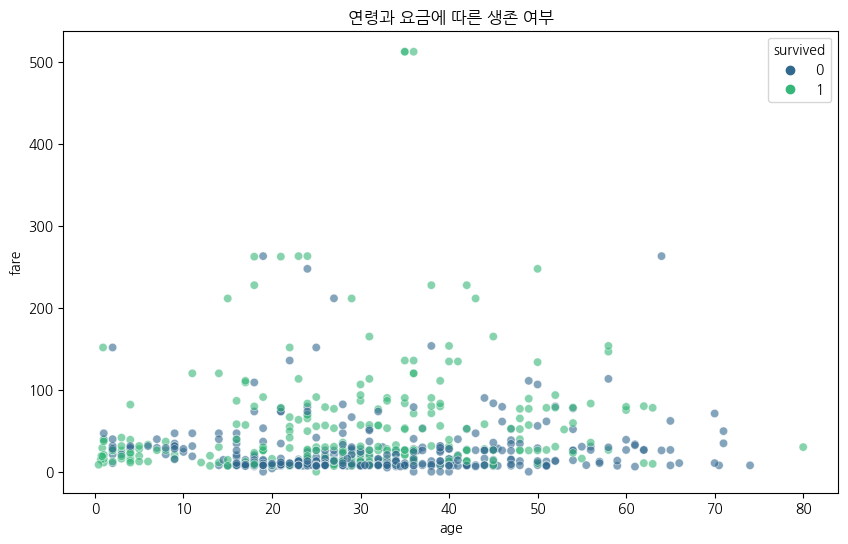

In [52]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=titanic, x='age', y='fare', hue='survived',  palette='viridis', alpha=0.6)
plt.title('연령과 요금에 따른 생존 여부')
plt.show()

5. 각 클래스별 승객의 연령 분포를 박스 플롯으로 나타내세요.


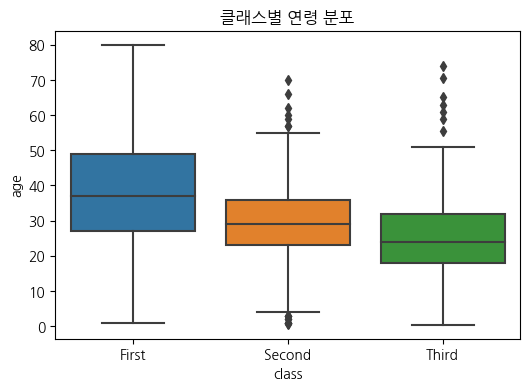

In [106]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=titanic, x='class', y='age')
plt.title('클래스별 연령 분포')
plt.show()

6. 각 클래스별 승객 수를 도넛 차트로 시각화하세요.


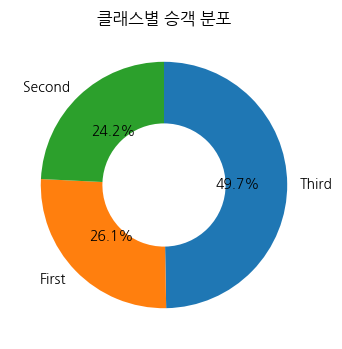

In [113]:
class_counts = titanic['class'].value_counts()
plt.figure(figsize=(6, 4))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=90, counterclock=False, wedgeprops={'width': 0.5})
plt.title('클래스별 승객 분포')
plt.show()

7. 각 클래스에서의 생존자와 사망자 수를 스택드 바 차트로 나타내세요.


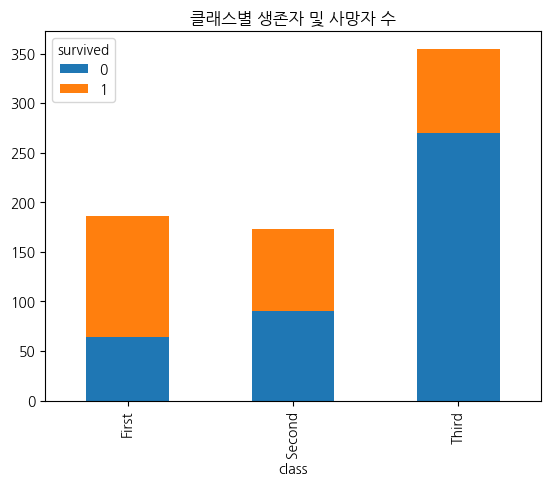

In [118]:
survival_class = titanic.pivot_table(index='class', columns='survived', values='age', aggfunc='count')
# survival_class.plot.bar(stacked=True)
survival_class.plot(kind='bar', stacked=True)
plt.title('클래스별 생존자 및 사망자 수')
plt.show()

8. 연령대, 요금, 생존 여부를 이용하여 버블 차트를 만드세요. 각 버블의 크기는 승객 수에 따라 다르게 하세요.


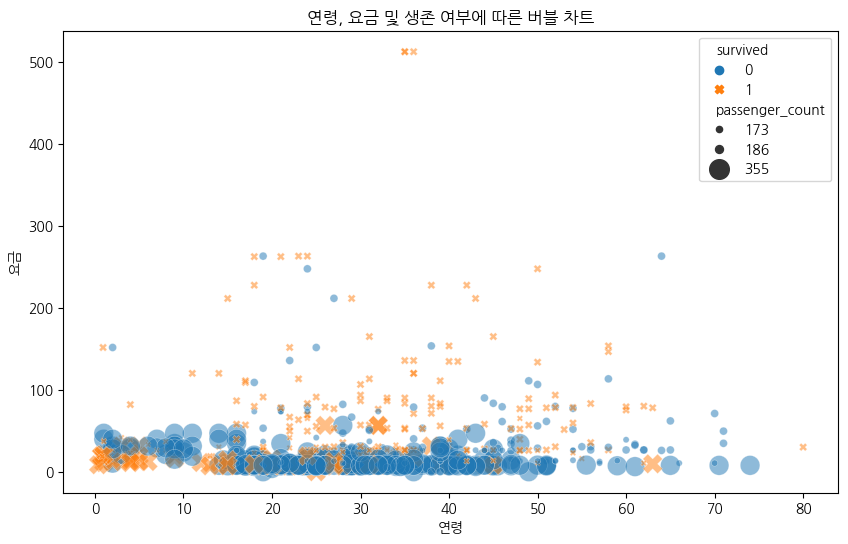

In [119]:
titanic = titanic.dropna(subset=['age', 'fare'])  # 'age'와 'fare'에 대한 결측치 제거

# 승객 클래스 별 승객 수 계산
passenger_counts = titanic['pclass'].value_counts()

# 원본 데이터에 승객 수 정보 추가
titanic['passenger_count'] = titanic['pclass'].map(passenger_counts)

# 버블 차트 생성
plt.figure(figsize=(10, 6))
sns.scatterplot(data=titanic, x='age', y='fare', size='passenger_count', sizes=(20, 200), hue='survived', style='survived', alpha=0.5)

# 차트 제목 및 레이블 설정
plt.title('연령, 요금 및 생존 여부에 따른 버블 차트')
plt.xlabel('연령')
plt.ylabel('요금')

# 그래프 표시
plt.show()

9. 탑승 항구별 승객 분포를 파이 차트로 나타내세요.


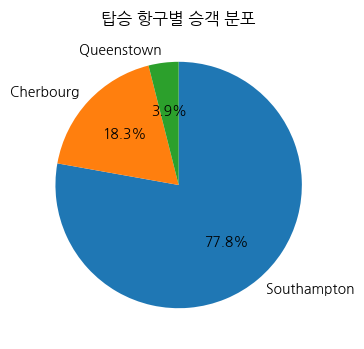

In [65]:
embark_counts = titanic['embark_town'].value_counts()
plt.figure(figsize=(6, 4))
plt.pie(embark_counts, labels=embark_counts.index, autopct='%1.1f%%', startangle=90, counterclock=False)
plt.title('탑승 항구별 승객 분포')
plt.show()

10. 클래스별, 성별 생존율을 히트맵으로 시각화하세요.


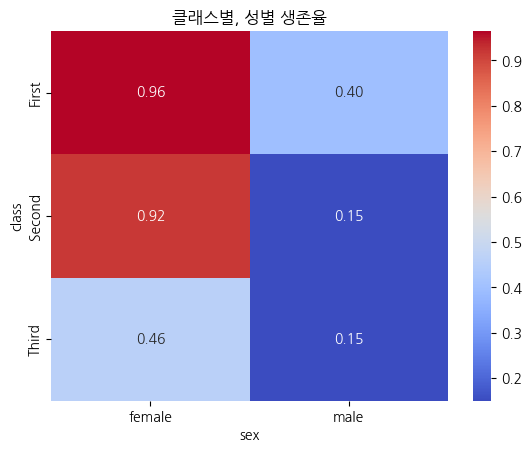

In [121]:
survival_heatmap = titanic.pivot_table(index='class', columns='sex', values='survived', aggfunc='mean')
sns.heatmap(survival_heatmap, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('클래스별, 성별 생존율')
plt.show()


11. 연령, 클래스, 요금, 생존 여부를 포함하여 다변량 데이터 관계를 페어플롯으로 나타내세요.


d:\kdt\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


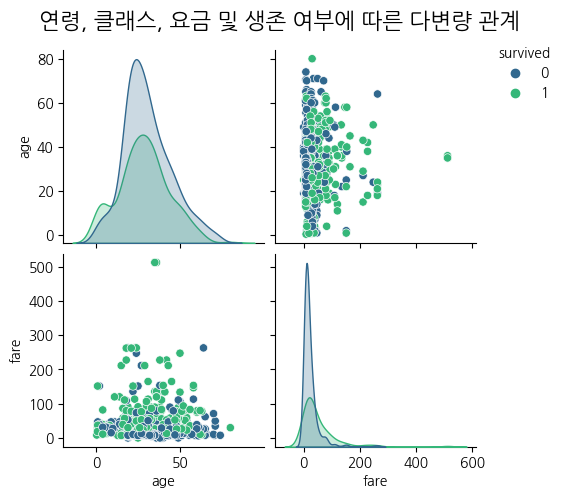

In [99]:
titanic = titanic.dropna(subset=['age', 'fare'])  # 'age'와 'fare'에 대한 결측치 제거

# Pairplot 생성
pairplot = sns.pairplot(titanic, vars=['age', 'fare'], hue='survived', palette='viridis')

# 제목 추가
plt.subplots_adjust(top=0.9)  # 제목이 차트와 겹치지 않도록 조정
pairplot.fig.suptitle('연령, 클래스, 요금 및 생존 여부에 따른 다변량 관계', fontsize=16, verticalalignment='top')

# 범례 위치 조정
pairplot._legend.set_bbox_to_anchor((1, 0.85))  # 범례를 차트 바깥 오른쪽 상단으로 이동

# 그래프 표시
plt.show()

12. 클래스와 성별에 따른 요금 분포를 바이올린 플롯으로 시각화하세요.


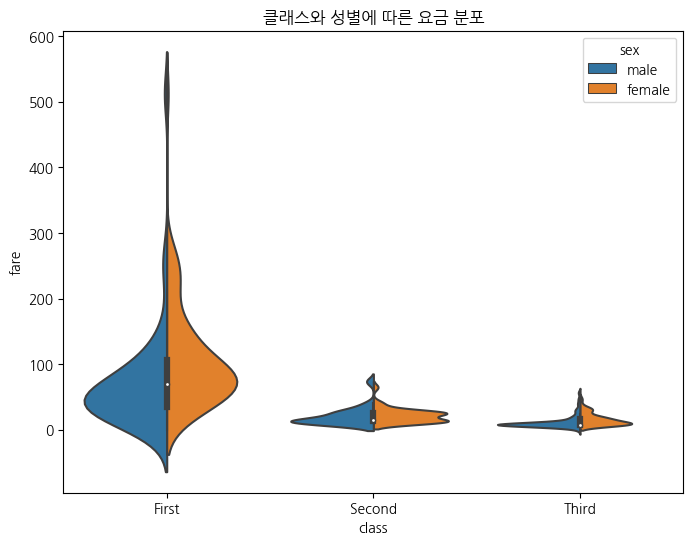

In [122]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='class', y='fare', hue='sex', data=titanic, split=True)
plt.title('클래스와 성별에 따른 요금 분포')
plt.show()


13. 연령대별 평균 요금 변화를 라인 플롯으로 나타내세요.


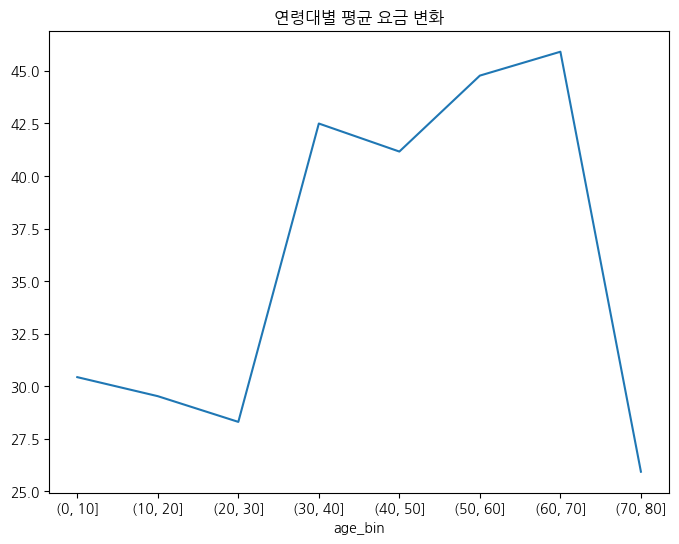

In [124]:
mean_fare_by_age = titanic.groupby('age_bin')['fare'].mean()
plt.figure(figsize=(8, 6))
mean_fare_by_age.plot(kind='line')
plt.title('연령대별 평균 요금 변화')
plt.show()

14. 서브플롯 활용한 연령대 및 성별 생존율 비교:
    가. 각 클래스별로 서브플롯을 생성하세요. 각 서브플롯 안에서 남성과 여성 승객의 연령대별(예: 0-10, 11-20, 21-30 등) 생존율을 바 차트로 비교하세요.
    나. 이 문제에서는 각 클래스(1등석, 2등석, 3등석)를 나타내는 세 개의 서브플롯을 만들고, 각 서브플롯 내에서는 성별에 따른 연령대별 생존율을 막대 그래프로 표시합니다. 성별을 색상으로 구분하여 표시하세요.

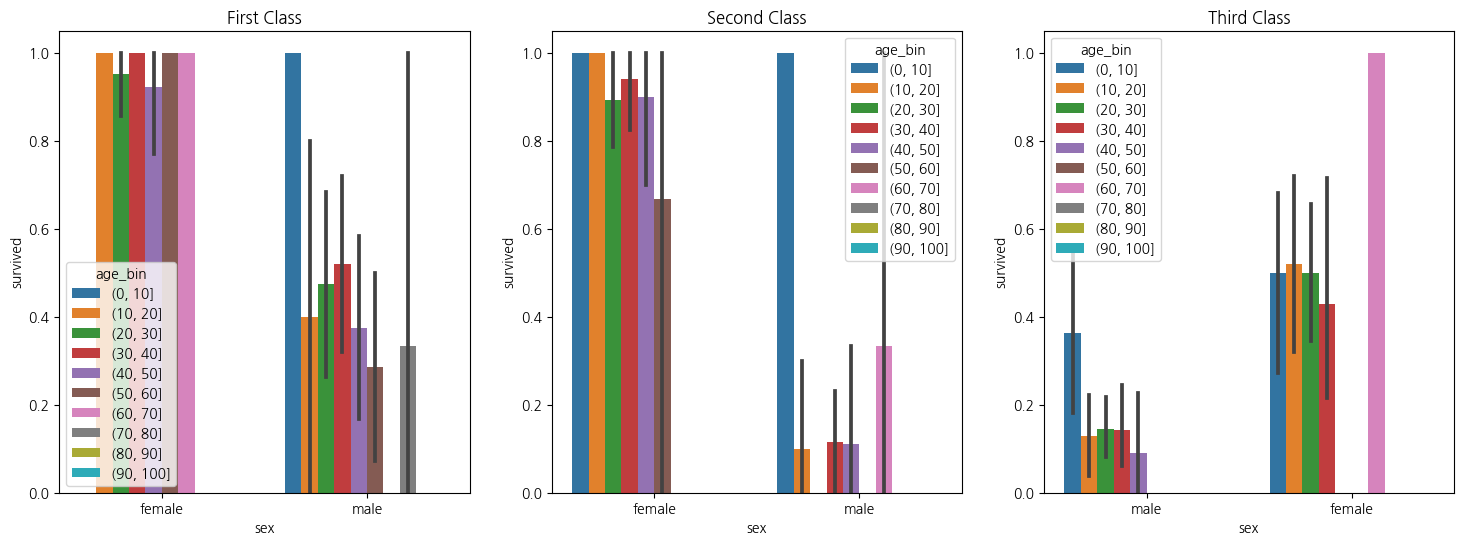

In [127]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))
for i, cls in enumerate(['First', 'Second', 'Third']):
    sns.barplot(data=titanic[titanic['class']==cls], x='sex', y='survived', hue='age_bin',  ax=axes[i])
    axes[i].set_title(f'{cls} Class')
plt.show()